# Clustering Crypto

In [95]:
# Initial imports
import requests
import pandas as pd
import matplotlib.pyplot as plt
import hvplot.pandas
import plotly.express as px
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.preprocessing import OrdinalEncoder

### Fetching Cryptocurrency Data

In [3]:
# Use the following endpoint to fetch json data
#url = "https://min-api.cryptocompare.com/data/all/coinlist"

In [ ]:
# Create a DataFrame 
# HINT: You will need to use the 'Data' key from the json response, then transpose the DataFrame.

In [52]:
# Alternatively, use the provided csv file:
# Create a DataFrame
dt = pd.read_csv("crypto_data.csv")
dt

,Unnamed: 0,CoinName,Algorithm,IsTrading,ProofType,TotalCoinsMined,TotalCoinSupply
0,42,42 Coin,Scrypt,True,PoW/PoS,4.199995e+01,42
1,365,365Coin,X11,True,PoW/PoS,NaN,2300000000
2,404,404Coin,Scrypt,True,PoW/PoS,1.055185e+09,532000000
3,611,SixEleven,SHA-256,True,PoW,NaN,611000
4,808,808,SHA-256,True,PoW/PoS,0.000000e+00,0
...,...,...,...,...,...,...,...
1247,XBC,BitcoinPlus,Scrypt,True,PoS,1.283270e+05,1000000
1248,DVTC,DivotyCoin,Scrypt,False,PoW/PoS,2.149121e+07,100000000
1249,GIOT,Giotto Coin,Scrypt,False,PoW/PoS,NaN,233100000
1250,OPSC,OpenSourceCoin,SHA-256,False,PoW/PoS,NaN,21000000


### Data Preprocessing

In [53]:
# Keep only necessary columns:
# 'CoinName','Algorithm','IsTrading','ProofType','TotalCoinsMined','TotalCoinSupply'
dt1=dt.loc[:,['CoinName','Algorithm','IsTrading','ProofType','TotalCoinsMined','TotalCoinSupply']]
dt1


,CoinName,Algorithm,IsTrading,ProofType,TotalCoinsMined,TotalCoinSupply
0,42 Coin,Scrypt,True,PoW/PoS,4.199995e+01,42
1,365Coin,X11,True,PoW/PoS,NaN,2300000000
2,404Coin,Scrypt,True,PoW/PoS,1.055185e+09,532000000
3,SixEleven,SHA-256,True,PoW,NaN,611000
4,808,SHA-256,True,PoW/PoS,0.000000e+00,0
...,...,...,...,...,...,...
1247,BitcoinPlus,Scrypt,True,PoS,1.283270e+05,1000000
1248,DivotyCoin,Scrypt,False,PoW/PoS,2.149121e+07,100000000
1249,Giotto Coin,Scrypt,False,PoW/PoS,NaN,233100000
1250,OpenSourceCoin,SHA-256,False,PoW/PoS,NaN,21000000


In [63]:
# Keep only cryptocurrencies that are trading
dt2 = dt1.loc[dt1['IsTrading'] == True]
dt2

,CoinName,Algorithm,IsTrading,ProofType,TotalCoinsMined,TotalCoinSupply
0,42 Coin,Scrypt,True,PoW/PoS,4.199995e+01,42
1,365Coin,X11,True,PoW/PoS,NaN,2300000000
2,404Coin,Scrypt,True,PoW/PoS,1.055185e+09,532000000
3,SixEleven,SHA-256,True,PoW,NaN,611000
4,808,SHA-256,True,PoW/PoS,0.000000e+00,0
...,...,...,...,...,...,...
1243,Super Zero,Ethash,True,PoW,NaN,1000000000
1244,UOS,SHA-256,True,DPoI,NaN,1000000000
1245,Beldex,CryptoNight,True,PoW,9.802226e+08,1400222610
1246,Horizen,Equihash,True,PoW,7.296538e+06,21000000


In [65]:
# Keep only cryptocurrencies with a working algorithm
### drop the Nan -- in the total coinds mined column 
dt3 = dt2.dropna()
dt3

,CoinName,Algorithm,IsTrading,ProofType,TotalCoinsMined,TotalCoinSupply
0,42 Coin,Scrypt,True,PoW/PoS,4.199995e+01,42
2,404Coin,Scrypt,True,PoW/PoS,1.055185e+09,532000000
4,808,SHA-256,True,PoW/PoS,0.000000e+00,0
5,EliteCoin,X13,True,PoW/PoS,2.927942e+10,314159265359
7,Bitcoin,SHA-256,True,PoW,1.792718e+07,21000000
...,...,...,...,...,...,...
1238,ZEPHYR,SHA-256,True,DPoS,2.000000e+09,2000000000
1242,Gapcoin,Scrypt,True,PoW/PoS,1.493105e+07,250000000
1245,Beldex,CryptoNight,True,PoW,9.802226e+08,1400222610
1246,Horizen,Equihash,True,PoW,7.296538e+06,21000000


In [67]:
# Remove the "IsTrading" column
dt4 = dt3.drop(['IsTrading'], axis=1)
dt4

,CoinName,Algorithm,ProofType,TotalCoinsMined,TotalCoinSupply
0,42 Coin,Scrypt,PoW/PoS,4.199995e+01,42
2,404Coin,Scrypt,PoW/PoS,1.055185e+09,532000000
4,808,SHA-256,PoW/PoS,0.000000e+00,0
5,EliteCoin,X13,PoW/PoS,2.927942e+10,314159265359
7,Bitcoin,SHA-256,PoW,1.792718e+07,21000000
...,...,...,...,...,...
1238,ZEPHYR,SHA-256,DPoS,2.000000e+09,2000000000
1242,Gapcoin,Scrypt,PoW/PoS,1.493105e+07,250000000
1245,Beldex,CryptoNight,PoW,9.802226e+08,1400222610
1246,Horizen,Equihash,PoW,7.296538e+06,21000000


In [ ]:
# Remove rows with at least 1 null value
## this was done above where we did a dropna 

In [70]:
# Remove rows with cryptocurrencies having no coins mined
dt5 = dt4.loc[dt1['TotalCoinsMined'] != 0]
dt5

,CoinName,Algorithm,ProofType,TotalCoinsMined,TotalCoinSupply
0,42 Coin,Scrypt,PoW/PoS,4.199995e+01,42
2,404Coin,Scrypt,PoW/PoS,1.055185e+09,532000000
5,EliteCoin,X13,PoW/PoS,2.927942e+10,314159265359
7,Bitcoin,SHA-256,PoW,1.792718e+07,21000000
8,Ethereum,Ethash,PoW,1.076842e+08,0
...,...,...,...,...,...
1238,ZEPHYR,SHA-256,DPoS,2.000000e+09,2000000000
1242,Gapcoin,Scrypt,PoW/PoS,1.493105e+07,250000000
1245,Beldex,CryptoNight,PoW,9.802226e+08,1400222610
1246,Horizen,Equihash,PoW,7.296538e+06,21000000


In [87]:
# Drop rows where there are 'N/A' text values
print(dt5.loc[dt1['CoinName'] == 'N/A'].value_counts())
print(dt5.loc[dt1['Algorithm'] == 'N/A'].value_counts())
print(dt5.loc[dt1['ProofType'] == 'N/A'].value_counts())
print(dt5.loc[dt1['TotalCoinsMined'] == 'N/A'].value_counts())
print(dt5.loc[dt1['TotalCoinSupply'] == 'N/A'].value_counts())

# Find null values
for column in dt5.columns:
    print(f"Column {column} has {dt5[column].isnull().sum()} null values")


Series([], dtype: int64)
Series([], dtype: int64)
Series([], dtype: int64)
Series([], dtype: int64)
Series([], dtype: int64)
Column CoinName has 0 null values
Column Algorithm has 0 null values
Column ProofType has 0 null values
Column TotalCoinsMined has 0 null values
Column TotalCoinSupply has 0 null values


In [85]:
# Store the 'CoinName'column in its own DataFrame prior to dropping it from crypto_df
cn = pd.DataFrame(dt5['CoinName'])
cn

,CoinName
0,42 Coin
2,404Coin
5,EliteCoin
7,Bitcoin
8,Ethereum
...,...
1238,ZEPHYR
1242,Gapcoin
1245,Beldex
1246,Horizen


In [86]:
# Drop the 'CoinName' column since it's not going to be used on the clustering algorithm
dt6 = dt5.drop(['CoinName'], axis=1)
dt6

,Algorithm,ProofType,TotalCoinsMined,TotalCoinSupply
0,Scrypt,PoW/PoS,4.199995e+01,42
2,Scrypt,PoW/PoS,1.055185e+09,532000000
5,X13,PoW/PoS,2.927942e+10,314159265359
7,SHA-256,PoW,1.792718e+07,21000000
8,Ethash,PoW,1.076842e+08,0
...,...,...,...,...
1238,SHA-256,DPoS,2.000000e+09,2000000000
1242,Scrypt,PoW/PoS,1.493105e+07,250000000
1245,CryptoNight,PoW,9.802226e+08,1400222610
1246,Equihash,PoW,7.296538e+06,21000000


In [97]:
### get the distinct values in each column 
#print(dt6['Algorithm'].value_counts())
#print(dt6['ProofType'].value_counts())

ord_enc = OrdinalEncoder()
dt6["Algorithm"] = ord_enc.fit_transform(dt6[["Algorithm"]])
dt6["ProofType"] = ord_enc.fit_transform(dt6[["ProofType"]])
dt6

,Algorithm,ProofType,TotalCoinsMined,TotalCoinSupply
0,53.0,16.0,4.199995e+01,42
2,53.0,16.0,1.055185e+09,532000000
5,67.0,16.0,2.927942e+10,314159265359
7,47.0,13.0,1.792718e+07,21000000
8,20.0,13.0,1.076842e+08,0
...,...,...,...,...
1238,47.0,2.0,2.000000e+09,2000000000
1242,53.0,16.0,1.493105e+07,250000000
1245,10.0,13.0,9.802226e+08,1400222610
1246,18.0,13.0,7.296538e+06,21000000


In [98]:
# Create dummy variables for text features
dt6

,Algorithm,ProofType,TotalCoinsMined,TotalCoinSupply
0,53.0,16.0,4.199995e+01,42
2,53.0,16.0,1.055185e+09,532000000
5,67.0,16.0,2.927942e+10,314159265359
7,47.0,13.0,1.792718e+07,21000000
8,20.0,13.0,1.076842e+08,0
...,...,...,...,...
1238,47.0,2.0,2.000000e+09,2000000000
1242,53.0,16.0,1.493105e+07,250000000
1245,10.0,13.0,9.802226e+08,1400222610
1246,18.0,13.0,7.296538e+06,21000000


In [113]:
# Standardize data
x_scaler = MinMaxScaler()
x_scaler.fit(dt6)
dt7 = x_scaler.transform(dt6)
dt7

array([[7.46478873e-01, 6.40000000e-01, 5.94230127e-03, 4.20000000e-11,
        5.00000000e-01],
       [7.46478873e-01, 6.40000000e-01, 7.00182308e-03, 5.32000000e-04,
        5.00000000e-01],
       [9.43661972e-01, 6.40000000e-01, 3.53420682e-02, 3.14159265e-01,
        5.00000000e-01],
       ...,
       [1.40845070e-01, 5.20000000e-01, 6.92655266e-03, 1.40022261e-03,
        1.00000000e+00],
       [2.53521127e-01, 5.20000000e-01, 5.94962775e-03, 2.10000000e-05,
        1.00000000e+00],
       [7.46478873e-01, 3.20000000e-01, 5.94243008e-03, 1.00000000e-06,
        0.00000000e+00]])

### Reducing Dimensions Using PCA

In [114]:
# Use PCA to reduce dimensions to 3 principal components
model = KMeans(n_clusters=3, random_state=5)

 # Fitting model
model.fit(dt7)


KMeans(n_clusters=3, random_state=5)

In [115]:
# Get predictions
## this assigns a class to each row in the data frame 
predictions = model.predict(dt7)
print(predictions)
predictions.shape

[0 0 0 0 1 0 0 1 1 1 2 1 0 2 0 0 0 0 0 0 1 0 0 0 0 0 0 1 0 0 0 0 0 0 2 1 1
 0 0 0 0 0 2 2 0 1 0 0 0 0 2 0 0 0 0 0 0 0 0 1 2 0 0 2 0 0 0 0 0 1 0 0 0 0
 0 0 2 0 0 2 0 2 0 0 0 0 0 0 0 0 0 1 0 0 2 0 0 0 1 1 2 1 0 0 1 0 2 0 0 0 2
 0 0 0 0 0 2 1 0 0 0 0 1 0 0 0 0 0 0 1 0 0 0 2 0 0 2 1 0 1 0 0 0 0 1 0 1 0
 0 0 0 0 1 0 2 0 1 0 0 0 2 0 2 2 0 0 0 0 0 1 0 0 2 0 0 0 2 0 2 1 0 0 1 0 0
 0 0 1 0 0 2 0 0 0 0 2 0 0 1 2 2 0 2 0 1 1 1 0 0 0 0 0 2 0 0 0 2 0 0 0 0 0
 0 0 1 0 2 0 0 2 0 0 1 1 0 0 0 0 0 0 1 2 0 0 2 0 1 0 0 1 2 1 0 1 0 0 2 0 1
 2 0 0 0 0 2 0 0 2 0 2 0 0 2 0 2 1 1 1 1 1 1 1 0 1 0 0 0 0 0 0 0 1 0 0 0 1
 2 0 0 0 0 2 0 0 2 0 0 0 0 0 0 0 1 2 2 0 1 1 0 0 1 1 1 0 0 1 0 1 0 0 0 2 0
 2 0 1 1 1 0 1 1 0 1 0 1 1 1 2 2 0 1 0 0 0 0 1 0 1 2 1 0 0 0 2 0 0 1 2 1 0
 1 0 0 1 0 1 1 2 2 0 0 0 0 1 2 0 0 2 2 1 1 0 1 1 0 0 1 2 1 1 2 0 2 0 0 2 1
 2 0 1 1 0 0 2 1 1 1 1 0 2 1 0 1 0 2 2 2 2 1 0 1 0 0 2 0 2 1 2 0 0 1 1 0 1
 2 0 2 2 0 1 2 0 0 0 0 1 1 2 1 0 0 2 1 0 1 1 1 1 0 0 1 0 1 2 0 0 2 0 0 0 0
 0 0 0 0 1 0 0 0 1 0 1 0 

(533,)

In [116]:
# Create a DataFrame with the principal components data
dt6['Class'] = predictions
dt6

,Algorithm,ProofType,TotalCoinsMined,TotalCoinSupply,Class
0,53.0,16.0,4.199995e+01,42,0
2,53.0,16.0,1.055185e+09,532000000,0
5,67.0,16.0,2.927942e+10,314159265359,0
7,47.0,13.0,1.792718e+07,21000000,0
8,20.0,13.0,1.076842e+08,0,1
...,...,...,...,...,...
1238,47.0,2.0,2.000000e+09,2000000000,2
1242,53.0,16.0,1.493105e+07,250000000,0
1245,10.0,13.0,9.802226e+08,1400222610,1
1246,18.0,13.0,7.296538e+06,21000000,1


### Clustering Crytocurrencies Using K-Means

#### Find the Best Value for `k` Using the Elbow Curve

In [117]:
inertia = []
k = list(range(1, 11))

# Calculate the inertia for the range of k values
# Looking for the best k
for i in k:
    km = KMeans(n_clusters=i, random_state=0)
    km.fit(dt7)
    inertia.append(km.inertia_)

# Define a DataFrame to plot the Elbow Curve using hvPlot
elbow_data = {"k": k, "inertia": inertia}
df_elbow = pd.DataFrame(elbow_data)
df_elbow.hvplot.line(x="k", y="inertia", title="Elbow Curve", xticks=k)

# Create the Elbow Curve using hvPlot


:Curve   [k]   (inertia)

Running K-Means with `k=3`

In [143]:
# Initialize the K-Means model
# Use PCA to reduce dimensions to 3 principal components
model = KMeans(n_clusters=3, random_state=5)

 # Fitting model
model.fit(dt7)
# Fit the model

# Predict clusters
predictions = model.predict(dt7)
print(predictions)
predictions.shape

# Create a new DataFrame including predicted clusters and cryptocurrencies features
#dt7['Class'] = predictions
dt7

[0 0 0 0 1 0 0 1 1 1 2 1 0 2 0 0 0 0 0 0 1 0 0 0 0 0 0 1 0 0 0 0 0 0 2 1 1
 0 0 0 0 0 2 2 0 1 0 0 0 0 2 0 0 0 0 0 0 0 0 1 2 0 0 2 0 0 0 0 0 1 0 0 0 0
 0 0 2 0 0 2 0 2 0 0 0 0 0 0 0 0 0 1 0 0 2 0 0 0 1 1 2 1 0 0 1 0 2 0 0 0 2
 0 0 0 0 0 2 1 0 0 0 0 1 0 0 0 0 0 0 1 0 0 0 2 0 0 2 1 0 1 0 0 0 0 1 0 1 0
 0 0 0 0 1 0 2 0 1 0 0 0 2 0 2 2 0 0 0 0 0 1 0 0 2 0 0 0 2 0 2 1 0 0 1 0 0
 0 0 1 0 0 2 0 0 0 0 2 0 0 1 2 2 0 2 0 1 1 1 0 0 0 0 0 2 0 0 0 2 0 0 0 0 0
 0 0 1 0 2 0 0 2 0 0 1 1 0 0 0 0 0 0 1 2 0 0 2 0 1 0 0 1 2 1 0 1 0 0 2 0 1
 2 0 0 0 0 2 0 0 2 0 2 0 0 2 0 2 1 1 1 1 1 1 1 0 1 0 0 0 0 0 0 0 1 0 0 0 1
 2 0 0 0 0 2 0 0 2 0 0 0 0 0 0 0 1 2 2 0 1 1 0 0 1 1 1 0 0 1 0 1 0 0 0 2 0
 2 0 1 1 1 0 1 1 0 1 0 1 1 1 2 2 0 1 0 0 0 0 1 0 1 2 1 0 0 0 2 0 0 1 2 1 0
 1 0 0 1 0 1 1 2 2 0 0 0 0 1 2 0 0 2 2 1 1 0 1 1 0 0 1 2 1 1 2 0 2 0 0 2 1
 2 0 1 1 0 0 2 1 1 1 1 0 2 1 0 1 0 2 2 2 2 1 0 1 0 0 2 0 2 1 2 0 0 1 1 0 1
 2 0 2 2 0 1 2 0 0 0 0 1 1 2 1 0 0 2 1 0 1 1 1 1 0 0 1 0 1 2 0 0 2 0 0 0 0
 0 0 0 0 1 0 0 0 1 0 1 0 

array([[7.46478873e-01, 6.40000000e-01, 5.94230127e-03, 4.20000000e-11,
        5.00000000e-01],
       [7.46478873e-01, 6.40000000e-01, 7.00182308e-03, 5.32000000e-04,
        5.00000000e-01],
       [9.43661972e-01, 6.40000000e-01, 3.53420682e-02, 3.14159265e-01,
        5.00000000e-01],
       ...,
       [1.40845070e-01, 5.20000000e-01, 6.92655266e-03, 1.40022261e-03,
        1.00000000e+00],
       [2.53521127e-01, 5.20000000e-01, 5.94962775e-03, 2.10000000e-05,
        1.00000000e+00],
       [7.46478873e-01, 3.20000000e-01, 5.94243008e-03, 1.00000000e-06,
        0.00000000e+00]])

### Visualizing Results

#### 3D-Scatter with Clusters

In [144]:
# Create a 3D-Scatter with the PCA data and the clusters
dt8 = pd.DataFrame(dt7)
dt8.rename(columns={"0":"Algorithm", "1":"ProofType", "2":"TotalCoinsMined", "3":"TotalCoinSupply"})
dt8['Class'] = predictions
dt8
#Algorithm	ProofType	TotalCoinsMined	TotalCoinSupply	Cla

,0,1,2,3,4,Class
0,0.746479,0.64,0.005942,4.200000e-11,0.5,0
1,0.746479,0.64,0.007002,5.320000e-04,0.5,0
2,0.943662,0.64,0.035342,3.141593e-01,0.5,0
3,0.661972,0.52,0.005960,2.100000e-05,0.5,0
4,0.281690,0.52,0.006050,0.000000e+00,1.0,1
...,...,...,...,...,...,...
528,0.661972,0.08,0.007951,2.000000e-03,0.0,2
529,0.746479,0.64,0.005957,2.500000e-04,0.5,0
530,0.140845,0.52,0.006927,1.400223e-03,1.0,1
531,0.253521,0.52,0.005950,2.100000e-05,1.0,1


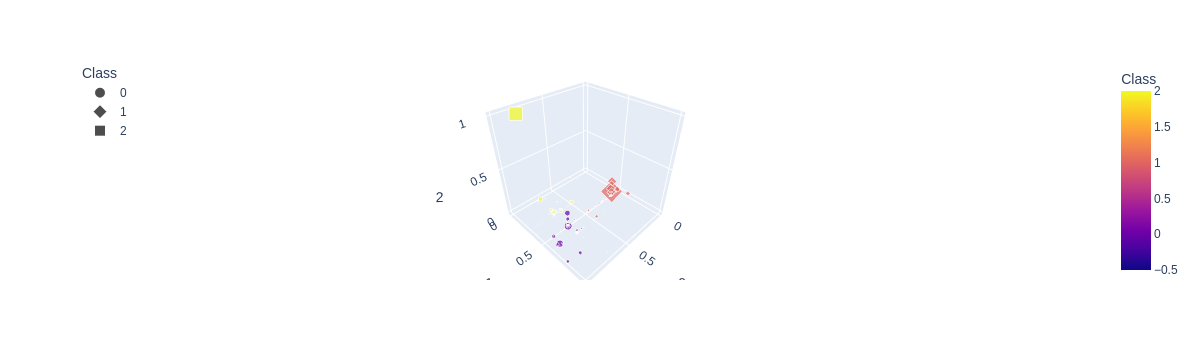

In [145]:


fig = px.scatter_3d(
    dt8,
    x=0,
    y=1,
    z=2,
    color="Class",
    symbol="Class",
    size=3,
    width=800,
)
fig.update_layout(legend=dict(x=0, y=1))
fig.show()

#### Table of Tradable Cryptocurrencies

In [146]:
# Table with tradable cryptos
dt8['Class'].value_counts()

0    312
1    127
2     94
Name: Class, dtype: int64

In [169]:
# Print the total number of tradable cryptocurrencies
## coins mined is on the z-axis and is Class 2 has the highest value 
## hence coins with a class 2 are the most tradeable cryptocurrencies 
dt9 = dt8.loc[dt8['Class'] == 2]
dt9

,0,1,2,3,4,Class
10,0.704225,0.32,0.008695,0.003601,0.0,2
13,0.661972,0.32,0.005954,0.000012,0.0,2
34,0.746479,0.28,0.046107,0.040000,0.0,2
42,0.577465,0.32,0.005948,0.000000,0.0,2
43,0.746479,0.44,0.006406,0.000000,0.0,2
...,...,...,...,...,...,...
525,0.577465,0.32,0.005952,0.000009,0.0,2
526,0.845070,0.08,1.000000,0.990000,0.0,2
527,0.577465,0.36,0.006946,0.001000,0.0,2
528,0.661972,0.08,0.007951,0.002000,0.0,2


#### Scatter Plot with Tradable Cryptocurrencies

In [170]:
# Scale data to create the scatter plot
## the data is already scaled -- from the previous step 
dt10 = pd.DataFrame({"TotalCoinsMined": dt9[2], "TotalCoinSupply": dt9[3]}) 
dt10

,TotalCoinsMined,TotalCoinSupply
10,0.008695,0.003601
13,0.005954,0.000012
34,0.046107,0.040000
42,0.005948,0.000000
43,0.006406,0.000000
...,...,...
525,0.005952,0.000009
526,1.000000,0.990000
527,0.006946,0.001000
528,0.007951,0.002000


In [171]:
# Plot the scatter with x="TotalCoinsMined" and y="TotalCoinSupply"
dt10.hvplot.scatter(x="TotalCoinsMined", y="TotalCoinSupply", title="Tradeable Coins", xticks="TotalCoinsMined")



:Scatter   [TotalCoinsMined]   (TotalCoinSupply)

In [ ]:
## This state more tradeable since there is low supply and are not mined -- therefore, due to scarcity, there are more opportunities to trade. 